In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


# Data Loading

In [2]:
data_path = pd.read_csv('/kaggle/input/test-file/tested.csv')

df = pd.DataFrame(data = data_path)

# Get familiar with our Data

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# Lets drop un-necessary columns

In [5]:
df.isna().sum() / df.shape[0] * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [6]:
df.nunique() / df.shape[0] * 100

PassengerId    100.000000
Survived         0.478469
Pclass           0.717703
Name           100.000000
Sex              0.478469
Age             18.899522
SibSp            1.674641
Parch            1.913876
Ticket          86.842105
Fare            40.430622
Cabin           18.181818
Embarked         0.717703
dtype: float64

Columns to Consider Dropping:
* PassengerId: This column is just an identifier and does not provide any meaningful information for analysis.

* Name: While unique, it typically serves as an identifier and may not directly contribute to analysis unless you derive features like titles (Mr., Mrs., etc.).

* Ticket: With 86.84% uniqueness, this column has a high variability and may not be relevant for analysis unless specific patterns can be extracted.

* Cabin: With 18.18% uniqueness and many missing values, this column might be less useful unless you can derive insights from the available data.

In [7]:
df = df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


Now as Age column has about 20% NaN values, lets replace the NaN values with the mean of the column

In [8]:
df.isna().sum() / df.shape[0] * 100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         20.574163
SibSp        0.000000
Parch        0.000000
Fare         0.239234
Embarked     0.000000
dtype: float64

In [9]:
df.loc[df['Age'].isna(), 'Age'] = df['Age'].mean()
df.loc[df['Fare'].isna(), 'Fare'] = df['Fare'].mean()
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Visualize Data

In [10]:
import seaborn as sns

In [11]:
survived_people = df['Survived'].value_counts()
survived_people

Survived
0    266
1    152
Name: count, dtype: int64

<Axes: xlabel='Survived'>

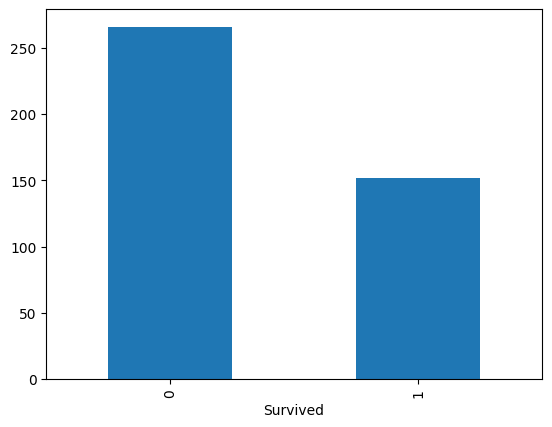

In [12]:
survived_people.plot(kind = 'bar')

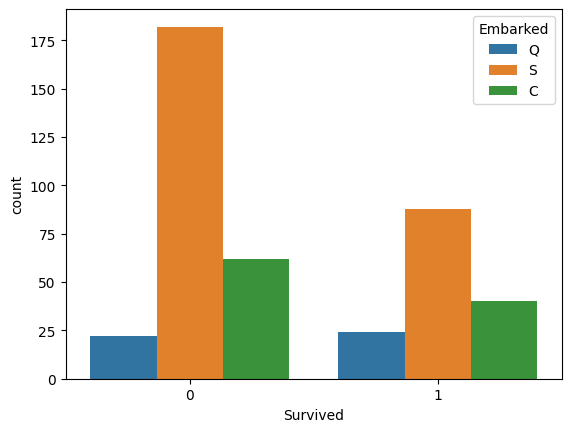

In [13]:
sns.countplot(x='Survived', data=df, hue='Embarked');

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


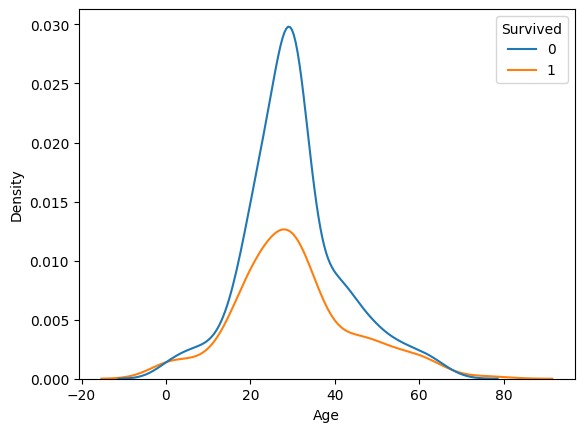

In [14]:
sns.kdeplot(x='Age', data=df, hue='Survived');

# Now lets divide Embarked column to 3 columns

In [15]:

df['S'] = pd.get_dummies(df['Embarked'], dtype = 'int')['S']
df['C'] = pd.get_dummies(df['Embarked'], dtype = 'int')['C']
df['Q'] = pd.get_dummies(df['Embarked'], dtype = 'int')['Q']
df = df.drop(columns = ['Embarked'])
df['Sex'] = df['Sex'].map({'male': 1, 'female':0})
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,S,C,Q
0,0,3,1,34.50000,0,0,7.8292,0,0,1
1,1,3,0,47.00000,1,0,7.0000,1,0,0
2,0,2,1,62.00000,0,0,9.6875,0,0,1
3,0,3,1,27.00000,0,0,8.6625,1,0,0
4,1,3,0,22.00000,1,1,12.2875,1,0,0
...,...,...,...,...,...,...,...,...,...,...
413,0,3,1,30.27259,0,0,8.0500,1,0,0
414,1,1,0,39.00000,0,0,108.9000,0,1,0
415,0,3,1,38.50000,0,0,7.2500,1,0,0
416,0,3,1,30.27259,0,0,8.0500,1,0,0


# Modeling

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN

In [18]:
X = df.drop(columns = 'Survived')
y = df['Survived']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

model = KNN(n_neighbors = 7)
#Train the model
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [57]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

# Check accuracy score of the model

In [60]:
from sklearn.metrics import accuracy_score, mean_absolute_error
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7023809523809523

# Check MSE

In [61]:
mse = mean_absolute_error(y_test , y_pred)
mse

0.2976190476190476